<a href="https://colab.research.google.com/github/thuyzy/GraduationThesis/blob/main/%5BGT%5D%20Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasist
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:

In [ ]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re
# Modeling and evaluation
import joblib
# Packages options
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đọc df từ file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-credit-score.csv').head(60000)

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0x17589,CUS_0xb43,April,NaN,16,487-34-1786,Entrepreneur,17995.83,1304.652500,7,...,Bad,1596.16,38.107795,9 Years and 0 Months,Yes,99.637536,37.93931797543644,Low_spent_Large_value_payments,262.88839572228125,Poor
59996,0x1758a,CUS_0xb43,May,John McCrankr,16,487-34-1786,Entrepreneur,17995.83,1304.652500,7,...,Bad,1596.16,36.613038,9 Years and 1 Months,NM,99.637536,144.86554589460792,Low_spent_Small_value_payments,175.96216780310982,Poor
59997,0x1758b,CUS_0xb43,June,John McCrankr,16,487-34-1786,Entrepreneur,17995.83,1304.652500,7,...,Bad,1596.16,27.707968,9 Years and 2 Months,Yes,99.637536,80.79225289062774,Low_spent_Small_value_payments,240.03546080708995,Standard
59998,0x1758c,CUS_0xb43,July,John McCrankr,17,487-34-1786,Entrepreneur,17995.83,1304.652500,7,...,_,1596.16,26.553127,9 Years and 3 Months,Yes,99.637536,144.72581988747788,Low_spent_Small_value_payments,176.10189381023983,Standard


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        60000 non-null  object 
 1   Customer_ID               60000 non-null  object 
 2   Month                     60000 non-null  object 
 3   Name                      54017 non-null  object 
 4   Age                       60000 non-null  object 
 5   SSN                       60000 non-null  object 
 6   Occupation                60000 non-null  object 
 7   Annual_Income             60000 non-null  object 
 8   Monthly_Inhand_Salary     51008 non-null  float64
 9   Num_Bank_Accounts         60000 non-null  int64  
 10  Num_Credit_Card           60000 non-null  int64  
 11  Interest_Rate             60000 non-null  int64  
 12  Num_of_Loan               60000 non-null  object 
 13  Type_of_Loan              53248 non-null  object 
 14  Delay_

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,51008.0,4188.185880,3186.196651,319.55625,1623.778333,3080.353333,5952.191667,15136.696667
Num_Bank_Accounts,60000.0,16.917600,116.867207,-1.00000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,60000.0,22.641067,129.872046,0.00000,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,60000.0,70.581833,458.631218,1.00000,8.000000,13.000000,20.000000,5788.000000
Delay_from_due_date,60000.0,21.158400,14.843671,-5.00000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,58860.0,27.346364,189.421791,0.00000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,60000.0,32.305369,5.114782,20.00000,28.069226,32.336536,36.525238,50.000000
Total_EMI_per_month,60000.0,1411.042183,8382.765593,0.00000,30.635718,69.055656,162.378141,82256.000000


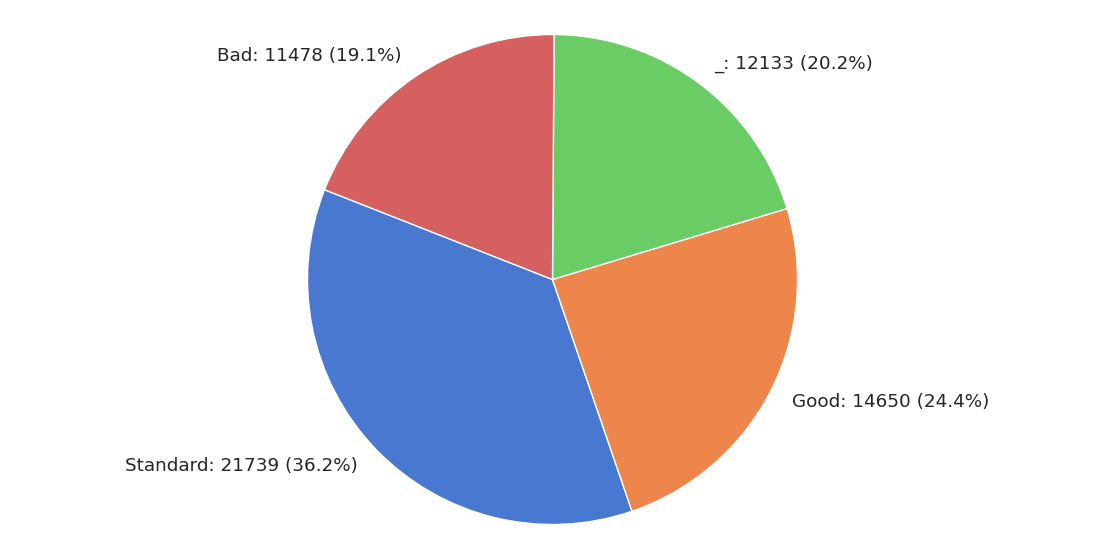

In [ ]:
df['Credit_Score'].value_counts()

# Tính số lượng và phần trăm của từng loại trong 'Credit_Mix'
counts = df['Credit_Mix'].value_counts()
percentages = counts / counts.sum() * 100

# Chuẩn bị dữ liệu cho biểu đồ pie
labels = [f'{label}: {count} ({percent:.1f}%)' for label, count, percent in zip(counts.index, counts, percentages)]

# Vẽ biểu đồ pie
plt.clf()  # Xóa hình vẽ trước đó (nếu có)
plt.pie(counts, labels=labels, autopct='', colors=sns.color_palette("muted"), startangle=158.5)
plt.axis('equal')  # Đảm bảo tỉ lệ trục x và y bằng nhau để vẽ hình tròn
# plt.legend(title='Credit SCore', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))  # Thêm chú thích ở bên ngoài biểu đồ
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, '_'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Standard'),
  Text(3, 0, 'Bad')])

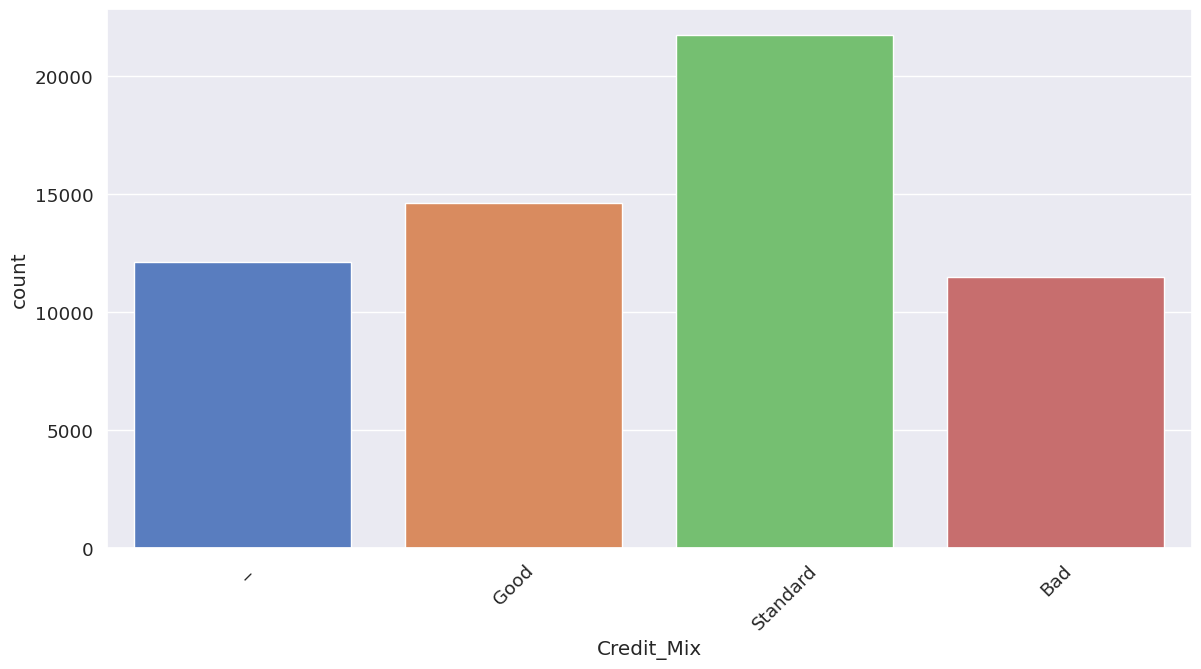

In [ ]:
sns.countplot(x = df['Credit_Mix'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Scientist'),
  Text(1, 0, '_______'),
  Text(2, 0, 'Teacher'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Entrepreneur'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Lawyer'),
  Text(7, 0, 'Media_Manager'),
  Text(8, 0, 'Doctor'),
  Text(9, 0, 'Journalist'),
  Text(10, 0, 'Manager'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Musician'),
  Text(13, 0, 'Mechanic'),
  Text(14, 0, 'Writer'),
  Text(15, 0, 'Architect')])

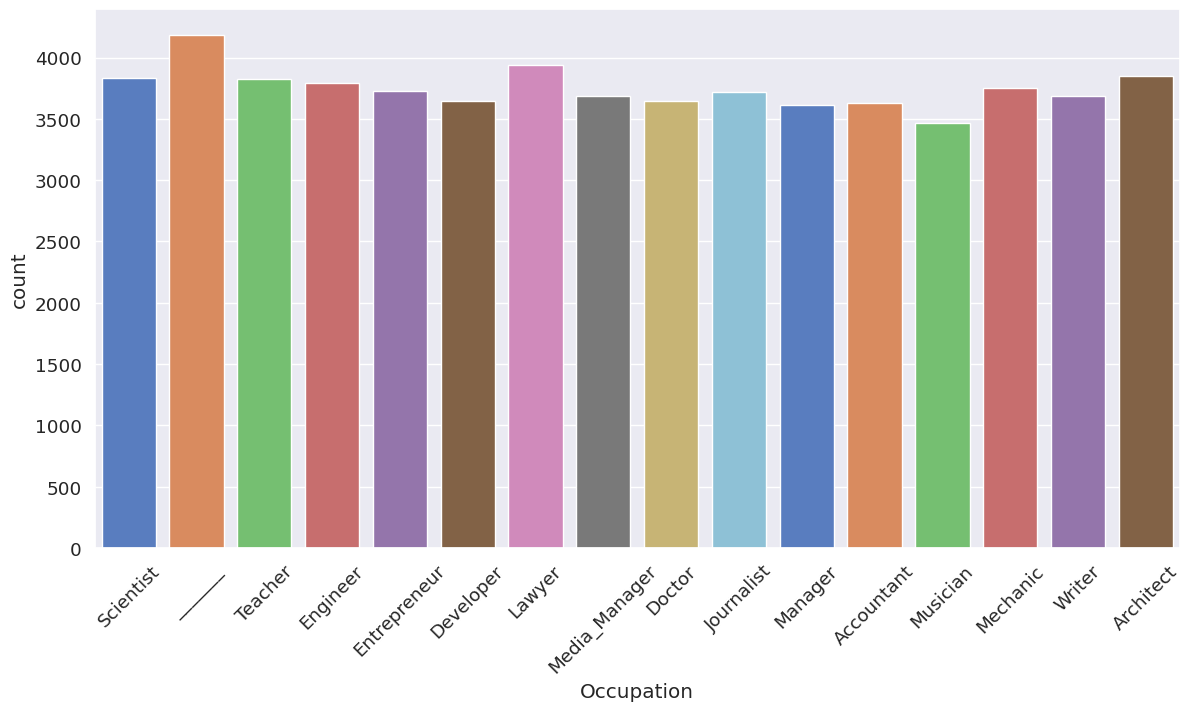

In [ ]:
sns.countplot(x = df['Occupation'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

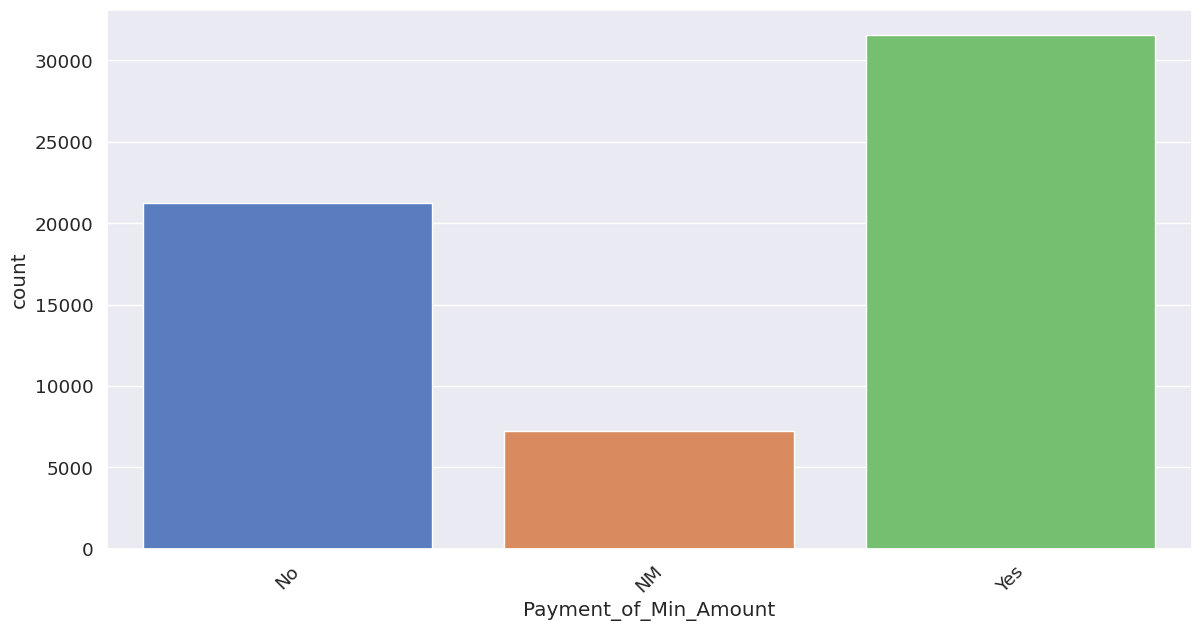

In [ ]:
sns.countplot(x = df['Payment_of_Min_Amount'],palette = "muted");
plt.xticks(rotation = 45)

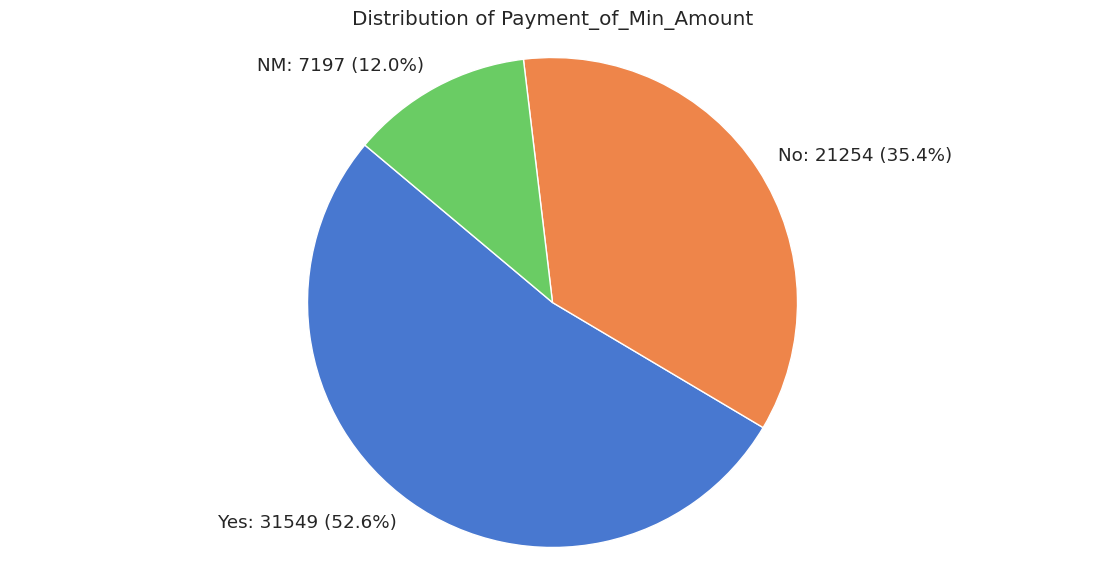

In [ ]:
# prompt: tạo biểu đồ tròn phân bổ có trọng số Payment_of_Min_Amount, có phần trăm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded
# ... (your existing code to load the dataframe)

# Calculate the value counts and percentages for 'Payment_of_Min_Amount'
payment_counts = df['Payment_of_Min_Amount'].value_counts()
payment_percentages = payment_counts / payment_counts.sum() * 100

# Create labels with counts and percentages
payment_labels = [f'{label}: {count} ({percent:.1f}%)' for label, count, percent in zip(payment_counts.index, payment_counts, payment_percentages)]

# Create the pie chart
plt.clf()
plt.pie(payment_counts, labels=payment_labels, autopct='', colors=sns.color_palette("muted"), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Payment_of_Min_Amount') # Add a title
plt.show()


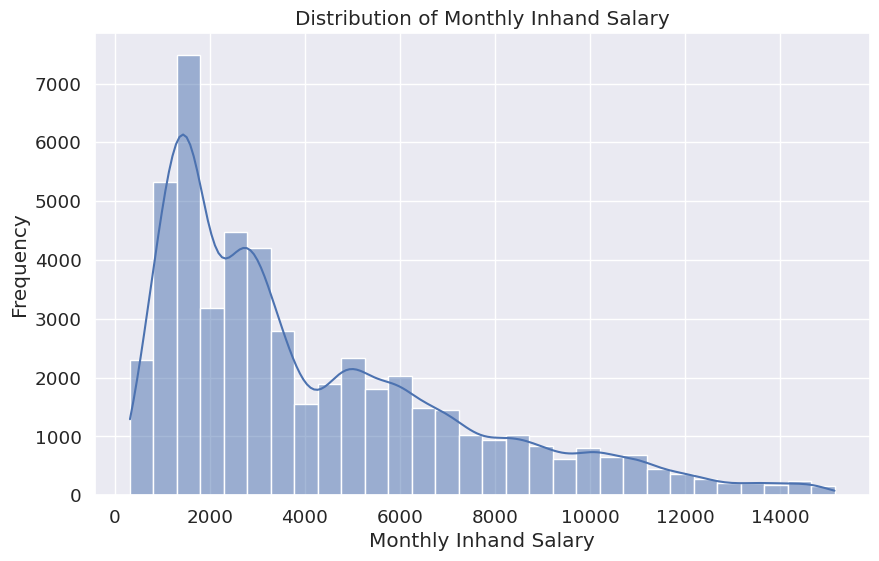

In [ ]:
# Biểu đồ distplot "Monthly_Inhand_Salary"
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Inhand_Salary'], kde=True, bins=30, edgecolor='white')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()

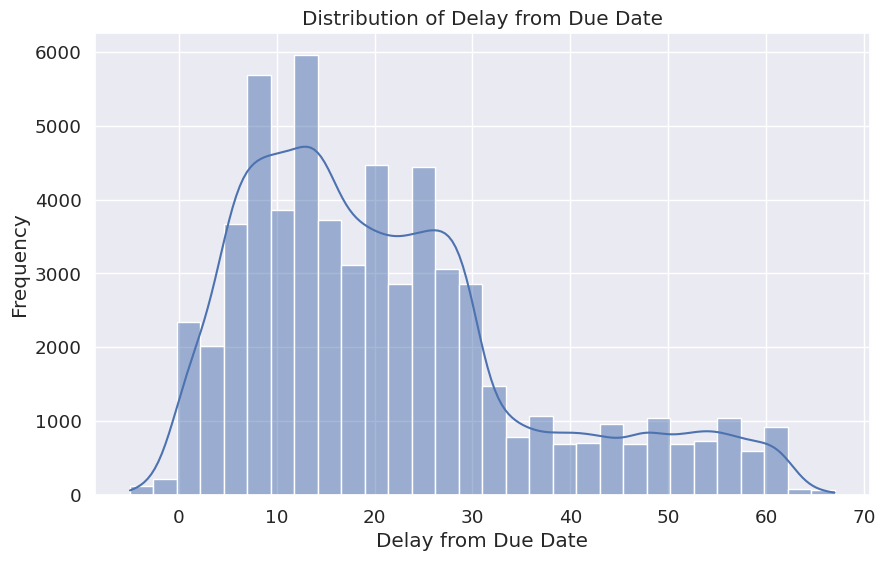

In [ ]:
# prompt: vẽ biểu đồ distplot của giá trị 'Delay_from_due_date', viền các cột

plt.figure(figsize=(10, 6))
sns.histplot(df['Delay_from_due_date'], kde=True, bins=30, edgecolor='white') # Added edgecolor
plt.title('Distribution of Delay from Due Date')
plt.xlabel('Delay from Due Date')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df['Type_of_Loan'].value_counts().head(10)

,count
Type_of_Loan,
Credit-Builder Loan,824
Not Specified,768
Payday Loan,720
Mortgage Loan,704
Personal Loan,704
Auto Loan,704
Student Loan,680
Debt Consolidation Loan,680
Home Equity Loan,632


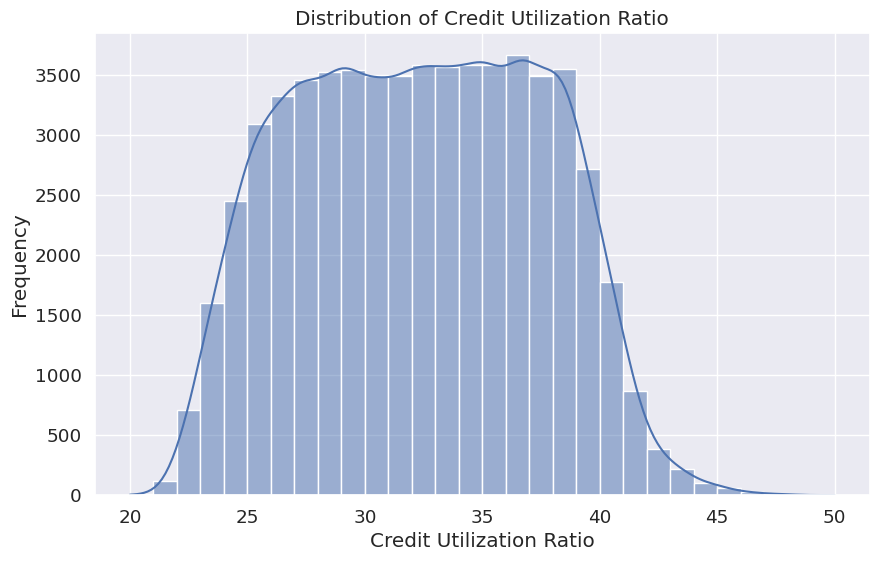

In [ ]:
# prompt: vẽ biểu đồ distplot cho cột Credit_Utilization_Ratio

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Utilization_Ratio'], kde=True, bins=30, edgecolor='white')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df['Credit_History_Age'].describe()

,Credit_History_Age
count,54571
unique,404
top,19 Years and 4 Months
freq,271


**DATA PREPROCESSING**

**Data Cleaning**

Removing Irrelevant Columns

In [ ]:
del df['ID']
del df['Name']
del df['SSN']
del df['Occupation']

del df['Month']
del df['Customer_ID']
del df['Age']
del df['Monthly_Inhand_Salary']

Fixing Numerical column

In [ ]:
to_fix = ['Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment',
          'Changed_Credit_Limit', 'Amount_invested_monthly',
          'Outstanding_Debt', 'Monthly_Balance']

In [ ]:
def fix_nums(num):
  try:
    return float(num.replace("_"," "))
  except:
    return np.nan

In [ ]:
for col in to_fix:
  df[col] = df[col].apply(fix_nums)

**Perform Feature Engineering**

Convert 'years and months' to months

In [ ]:
# prompt: Cột df['Credit_History_Age'] đang là object, tách lấy số years và số months và tính bằng công thức số years*12+số months cho từng dòng
import re
import numpy as np

def convert_credit_history_age(age_str):
    # Convert input to string to handle potential NaN or float values
    age_str = str(age_str)
    try:
        years, months = map(int, re.findall(r'\d+', age_str))
        return years * 12 + months
    except ValueError:
        return np.nan  # Handle cases where the pattern is not found

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age)


Divide type of loans into different columns

In [ ]:
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] :
  df[i] = df['Type_of_Loan'].str.contains(i)
del df['Type_of_Loan']

Get absolute values for bank accounts

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

Put Credit Card owned to atleast one

In [ ]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             60000 non-null  float64
 1   Num_Bank_Accounts         60000 non-null  int64  
 2   Num_Credit_Card           60000 non-null  int64  
 3   Interest_Rate             60000 non-null  int64  
 4   Num_of_Loan               60000 non-null  float64
 5   Delay_from_due_date       60000 non-null  int64  
 6   Num_of_Delayed_Payment    55834 non-null  float64
 7   Changed_Credit_Limit      58764 non-null  float64
 8   Num_Credit_Inquiries      58860 non-null  float64
 9   Credit_Mix                60000 non-null  object 
 10  Outstanding_Debt          60000 non-null  float64
 11  Credit_Utilization_Ratio  60000 non-null  float64
 12  Credit_History_Age        54571 non-null  float64
 13  Payment_of_Min_Amount     60000 non-null  object 
 14  Total_

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,31549
No,21254
NM,7197


In [ ]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,31549
No,28451


In [ ]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,15378
High_spent_Medium_value_payments,10592
Low_spent_Medium_value_payments,8253
High_spent_Large_value_payments,8123
High_spent_Small_value_payments,6857
Low_spent_Large_value_payments,6226
!@9#%8,4571


In [ ]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace = True)
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,15378
High_spent_Medium_value_payments,10592
Low_spent_Medium_value_payments,8253
High_spent_Large_value_payments,8123
High_spent_Small_value_payments,6857
Low_spent_Large_value_payments,6226


In [ ]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,21739
Good,14650
_,12133
Bad,11478


In [ ]:
m = {
"Bad": 0,
"Good": 2,
"Standard":1,
"_":np.nan
}

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [ ]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
1.0,21739
2.0,14650
0.0,11478


Handling missing data

In [ ]:
for col in list(df.columns[-8:]):
  df[col] = df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             60000 non-null  float64
 1   Num_Bank_Accounts         60000 non-null  int64  
 2   Num_Credit_Card           60000 non-null  int64  
 3   Interest_Rate             60000 non-null  int64  
 4   Num_of_Loan               60000 non-null  float64
 5   Delay_from_due_date       60000 non-null  int64  
 6   Num_of_Delayed_Payment    55834 non-null  float64
 7   Changed_Credit_Limit      58764 non-null  float64
 8   Num_Credit_Inquiries      58860 non-null  float64
 9   Credit_Mix                47867 non-null  float64
 10  Outstanding_Debt          60000 non-null  float64
 11  Credit_Utilization_Ratio  60000 non-null  float64
 12  Credit_History_Age        54571 non-null  float64
 13  Payment_of_Min_Amount     60000 non-null  object 
 14  Total_

In [ ]:
Numericals= df.select_dtypes(exclude = 'object').columns[1:]
Numericals

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Not Specified',
       'Payday Loan', 'Mortgage Loan', 'Personal Loan', 'Auto Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Home Equity Loan'],
      dtype='object')

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
for col in Numericals[1:]:
  df[[col]] = imputer.fit_transform(df[[col]])
imputer.fit_transform(df[['Payment_Behaviour']])

array([['High_spent_Small_value_payments'],
       ['Low_spent_Large_value_payments'],
       ['Low_spent_Medium_value_payments'],
       ...,
       ['Low_spent_Small_value_payments'],
       ['Low_spent_Small_value_payments'],
       ['Low_spent_Small_value_payments']], dtype=object)

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

**Handling Categorical Data**

In [ ]:
df.select_dtypes(include="object")

,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,No,High_spent_Small_value_payments,Good
1,No,Low_spent_Large_value_payments,Good
2,No,Low_spent_Medium_value_payments,Good
3,No,Low_spent_Small_value_payments,Good
4,No,High_spent_Medium_value_payments,Good
...,...,...,...
59995,Yes,Low_spent_Large_value_payments,Poor
59996,No,Low_spent_Small_value_payments,Poor
59997,Yes,Low_spent_Small_value_payments,Standard
59998,Yes,Low_spent_Small_value_payments,Standard


In [ ]:
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,31791
Poor,17510
Good,10699


In [ ]:
m = {
"Poor":0,
"Standard":1,
"Good":2
}

In [ ]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,31549
No,28451


In [ ]:
m = {
"Yes": 1,
"No":0
}

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(m)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             60000 non-null  float64
 1   Num_Bank_Accounts         60000 non-null  int64  
 2   Num_Credit_Card           60000 non-null  int64  
 3   Interest_Rate             60000 non-null  int64  
 4   Num_of_Loan               60000 non-null  float64
 5   Delay_from_due_date       60000 non-null  int64  
 6   Num_of_Delayed_Payment    60000 non-null  float64
 7   Changed_Credit_Limit      60000 non-null  float64
 8   Num_Credit_Inquiries      60000 non-null  float64
 9   Credit_Mix                60000 non-null  float64
 10  Outstanding_Debt          60000 non-null  float64
 11  Credit_Utilization_Ratio  60000 non-null  float64
 12  Credit_History_Age        60000 non-null  float64
 13  Payment_of_Min_Amount     60000 non-null  int64  
 14  Total_

In [ ]:
encoded = pd.get_dummies(df['Payment_Behaviour'],drop_first=True)
encoded

,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,True,False,False,False,False
...,...,...,...,...,...
59995,False,False,True,False,False
59996,False,False,False,False,True
59997,False,False,False,False,True
59998,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             60000 non-null  float64
 1   Num_Bank_Accounts         60000 non-null  int64  
 2   Num_Credit_Card           60000 non-null  int64  
 3   Interest_Rate             60000 non-null  int64  
 4   Num_of_Loan               60000 non-null  float64
 5   Delay_from_due_date       60000 non-null  int64  
 6   Num_of_Delayed_Payment    60000 non-null  float64
 7   Changed_Credit_Limit      60000 non-null  float64
 8   Num_Credit_Inquiries      60000 non-null  float64
 9   Credit_Mix                60000 non-null  float64
 10  Outstanding_Debt          60000 non-null  float64
 11  Credit_Utilization_Ratio  60000 non-null  float64
 12  Credit_History_Age        60000 non-null  float64
 13  Payment_of_Min_Amount     60000 non-null  int64  
 14  Total_

In [ ]:
encoded = pd.get_dummies(df['Payment_Behaviour'],drop_first=True)
df = pd.concat([df, encoded], axis=1)
df

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Personal Loan,Auto Loan,Student Loan,Debt Consolidation Loan,Home Equity Loan,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,19114.12,3,4,3,4.0,3,7.0,11.27,4.0,1.0,...,1.0,1.0,0.0,0.0,1.0,False,True,False,False,False
1,19114.12,3,4,3,4.0,-1,17.0,11.27,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,False,False,True,False,False
2,19114.12,3,4,3,4.0,3,7.0,11.32,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,False,False,False,True,False
3,19114.12,3,4,3,4.0,5,4.0,6.27,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,False,False,False,False,True
4,19114.12,3,4,3,4.0,6,17.0,11.27,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,17995.83,7,5,30,7.0,35,18.0,16.64,11.0,0.0,...,0.0,1.0,0.0,1.0,1.0,False,False,True,False,False
59996,17995.83,7,5,30,7.0,35,20.0,16.64,11.0,0.0,...,0.0,1.0,0.0,1.0,1.0,False,False,False,False,True
59997,17995.83,7,5,30,7.0,35,21.0,16.64,11.0,0.0,...,0.0,1.0,0.0,1.0,1.0,False,False,False,False,True
59998,17995.83,7,5,30,7.0,35,21.0,16.64,11.0,1.0,...,0.0,1.0,0.0,1.0,1.0,False,False,False,False,True


In [ ]:
order = [col for col in df.columns if col != 'Credit_Score'] + ['Credit_Score']
df = df[order]
del df['Payment_Behaviour']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual_Income                     60000 non-null  float64
 1   Num_Bank_Accounts                 60000 non-null  int64  
 2   Num_Credit_Card                   60000 non-null  int64  
 3   Interest_Rate                     60000 non-null  int64  
 4   Num_of_Loan                       60000 non-null  float64
 5   Delay_from_due_date               60000 non-null  int64  
 6   Num_of_Delayed_Payment            60000 non-null  float64
 7   Changed_Credit_Limit              60000 non-null  float64
 8   Num_Credit_Inquiries              60000 non-null  float64
 9   Credit_Mix                        60000 non-null  float64
 10  Outstanding_Debt                  60000 non-null  float64
 11  Credit_Utilization_Ratio          60000 non-null  float64
 12  Cred

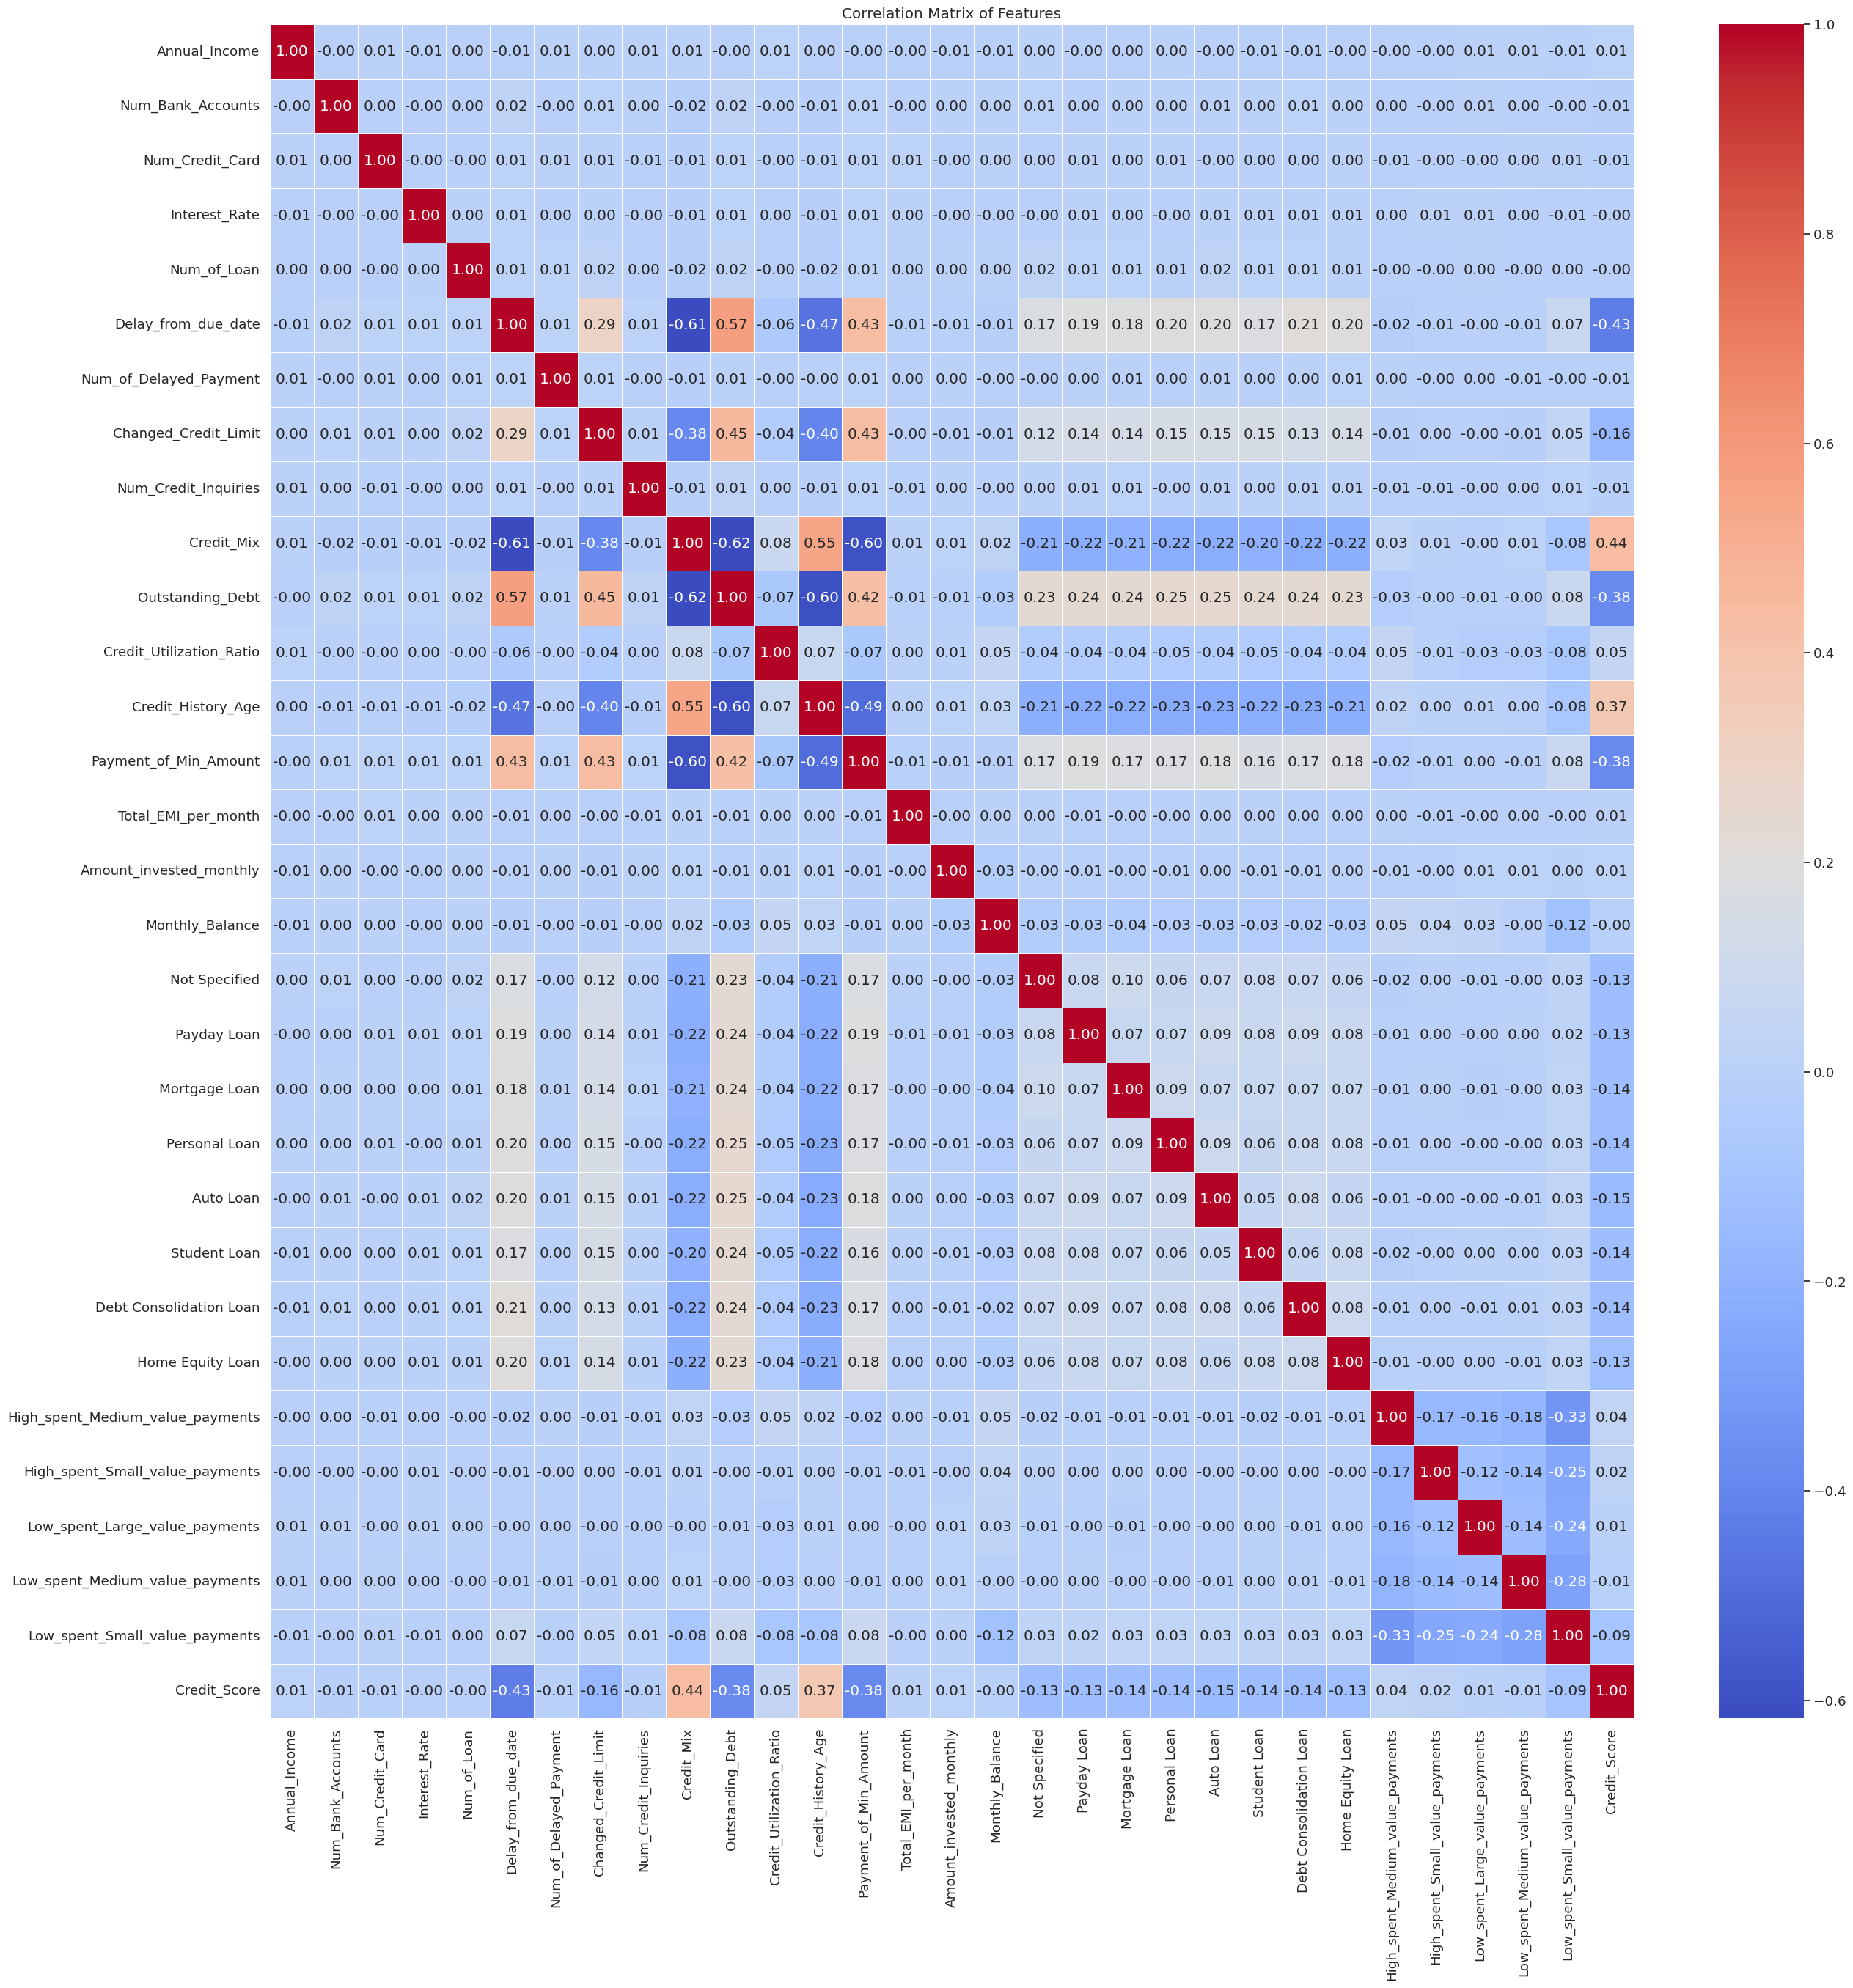

In [ ]:
# prompt: vẽ một heatmap tương quan giữa các biến, hiển thị kích thước phù hợp

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already loaded
# ... (your existing code to load the dataframe)


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv',index=False)
df

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Auto Loan,Student Loan,Debt Consolidation Loan,Home Equity Loan,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Credit_Score
0,19114.12,3,4,3,4.0,3,7.0,11.27,4.0,1.0,...,1.0,0.0,0.0,1.0,False,True,False,False,False,2
1,19114.12,3,4,3,4.0,-1,17.0,11.27,4.0,2.0,...,1.0,0.0,0.0,1.0,False,False,True,False,False,2
2,19114.12,3,4,3,4.0,3,7.0,11.32,4.0,2.0,...,1.0,0.0,0.0,1.0,False,False,False,True,False,2
3,19114.12,3,4,3,4.0,5,4.0,6.27,4.0,2.0,...,1.0,0.0,0.0,1.0,False,False,False,False,True,2
4,19114.12,3,4,3,4.0,6,17.0,11.27,4.0,2.0,...,1.0,0.0,0.0,1.0,True,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,17995.83,7,5,30,7.0,35,18.0,16.64,11.0,0.0,...,1.0,0.0,1.0,1.0,False,False,True,False,False,0
59996,17995.83,7,5,30,7.0,35,20.0,16.64,11.0,0.0,...,1.0,0.0,1.0,1.0,False,False,False,False,True,0
59997,17995.83,7,5,30,7.0,35,21.0,16.64,11.0,0.0,...,1.0,0.0,1.0,1.0,False,False,False,False,True,1
59998,17995.83,7,5,30,7.0,35,21.0,16.64,11.0,1.0,...,1.0,0.0,1.0,1.0,False,False,False,False,True,1


In [ ]:
df['Credit_Score'].value_counts()

,count
Credit_Score,
1,31791
0,17510
2,10699
